## Example Binning Iris

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz
from IPython.core.interactiveshell import InteractiveShell

In [2]:
df = pd.read_csv('Data/Iris/Iris-cleaned.csv')
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
df = df.sample(frac=1) # random sample of everything in random order -> resample it

In [4]:

df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object

In [5]:
df.species = df.species.astype('category')
df.dtypes

sepal length     float64
sepal width      float64
petal length     float64
petal width      float64
species         category
dtype: object

In [6]:
attributes = df.drop(['species'], axis = 1) #continuous -> one hot encode
target = df.species

In [7]:
for k in range(attributes.shape[1]):
    attributes.iloc[:,k] = pd.qcut(attributes.iloc[:,k], q = 3, labels=["S", "M", "L"])
attributes.head(10)

,sepal length,sepal width,petal length,petal width
78,M,S,M,M
66,M,M,M,M
133,M,S,L,M
112,L,M,L,L
6,S,L,S,S
81,M,S,M,M
141,L,M,L,L
121,M,S,M,L
88,M,M,M,M
95,M,M,M,M


In [8]:
attributes.head(2)

,sepal length,sepal width,petal length,petal width
78,M,S,M,M
66,M,M,M,M


Cross Tabulation

In [10]:
ct = pd.crosstab(target, attributes['sepal length'])
ct

sepal length,S,M,L
species,,,
setosa,45,5,0
versicolor,6,33,11
virginica,1,18,31


In [12]:
ct.sum(axis = 1)

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [14]:
ct.div(ct.sum(axis = 1), axis=0)

sepal length,S,M,L
species,,,
setosa,0.90,0.10,0.00
versicolor,0.12,0.66,0.22
virginica,0.02,0.36,0.62


Get probabilities instead of count


Given the plant of "setosa", there is 0 chance you get large measurements

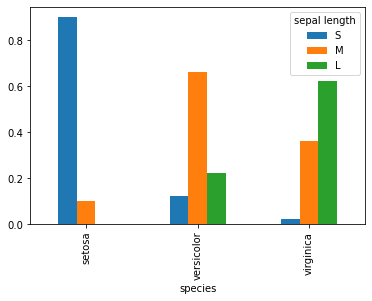

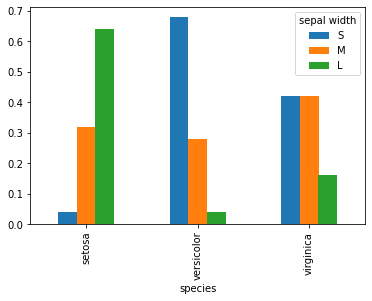

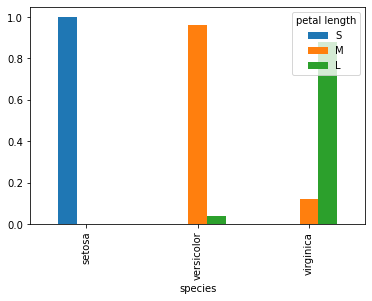

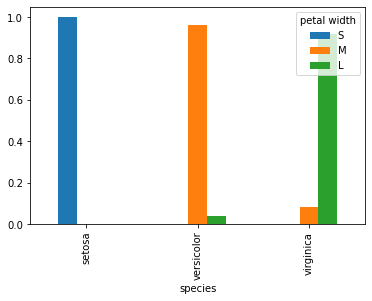

In [18]:
for k in range(attributes.shape[1]):
    ct = pd.crosstab(target, attributes.iloc[:,k])
    ct = ct.div(ct.sum(axis = 1), axis=0)
    #display(ct)
    ct.plot.bar()

If got sepal length small, which species would you predict? -> Setosa

If got sepal length large, which species would you predict? -> Verginica

If got sepal length large, which species would you predict? -> Versicolor

### Naive base classifier - Independent Assumption (got probility of assumption-> how accurate)

Known: P(Sepal length Small | setosa)=0.9
    
Want to calculate : P(setosa | sepal length Small)
    
|:given sepel length small, want to know probability of setosa